# KNN Case Study

# Author : Lakkam Nageshwari

# Read the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and Check Basic Details

### Load File

In [4]:
tele_data = pd.read_csv("C:\\datasets\\telecust.csv")
tele_data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


### Check Size of Data

In [3]:
tele_data.shape

(1000, 12)

### Check various Data type 

In [4]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null int64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null int64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: int64(12)
memory usage: 93.9 KB


### Check Statisticsl info of Data  

In [5]:
tele_data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### Check the Missing Value in Data 

In [7]:
tele_data.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

# id="visualization_analysis"
Data Visualization and Analysis 

#### Check  how many of each class is in our data set 

In [8]:
tele_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### Plot a Pair plot and Note down important point

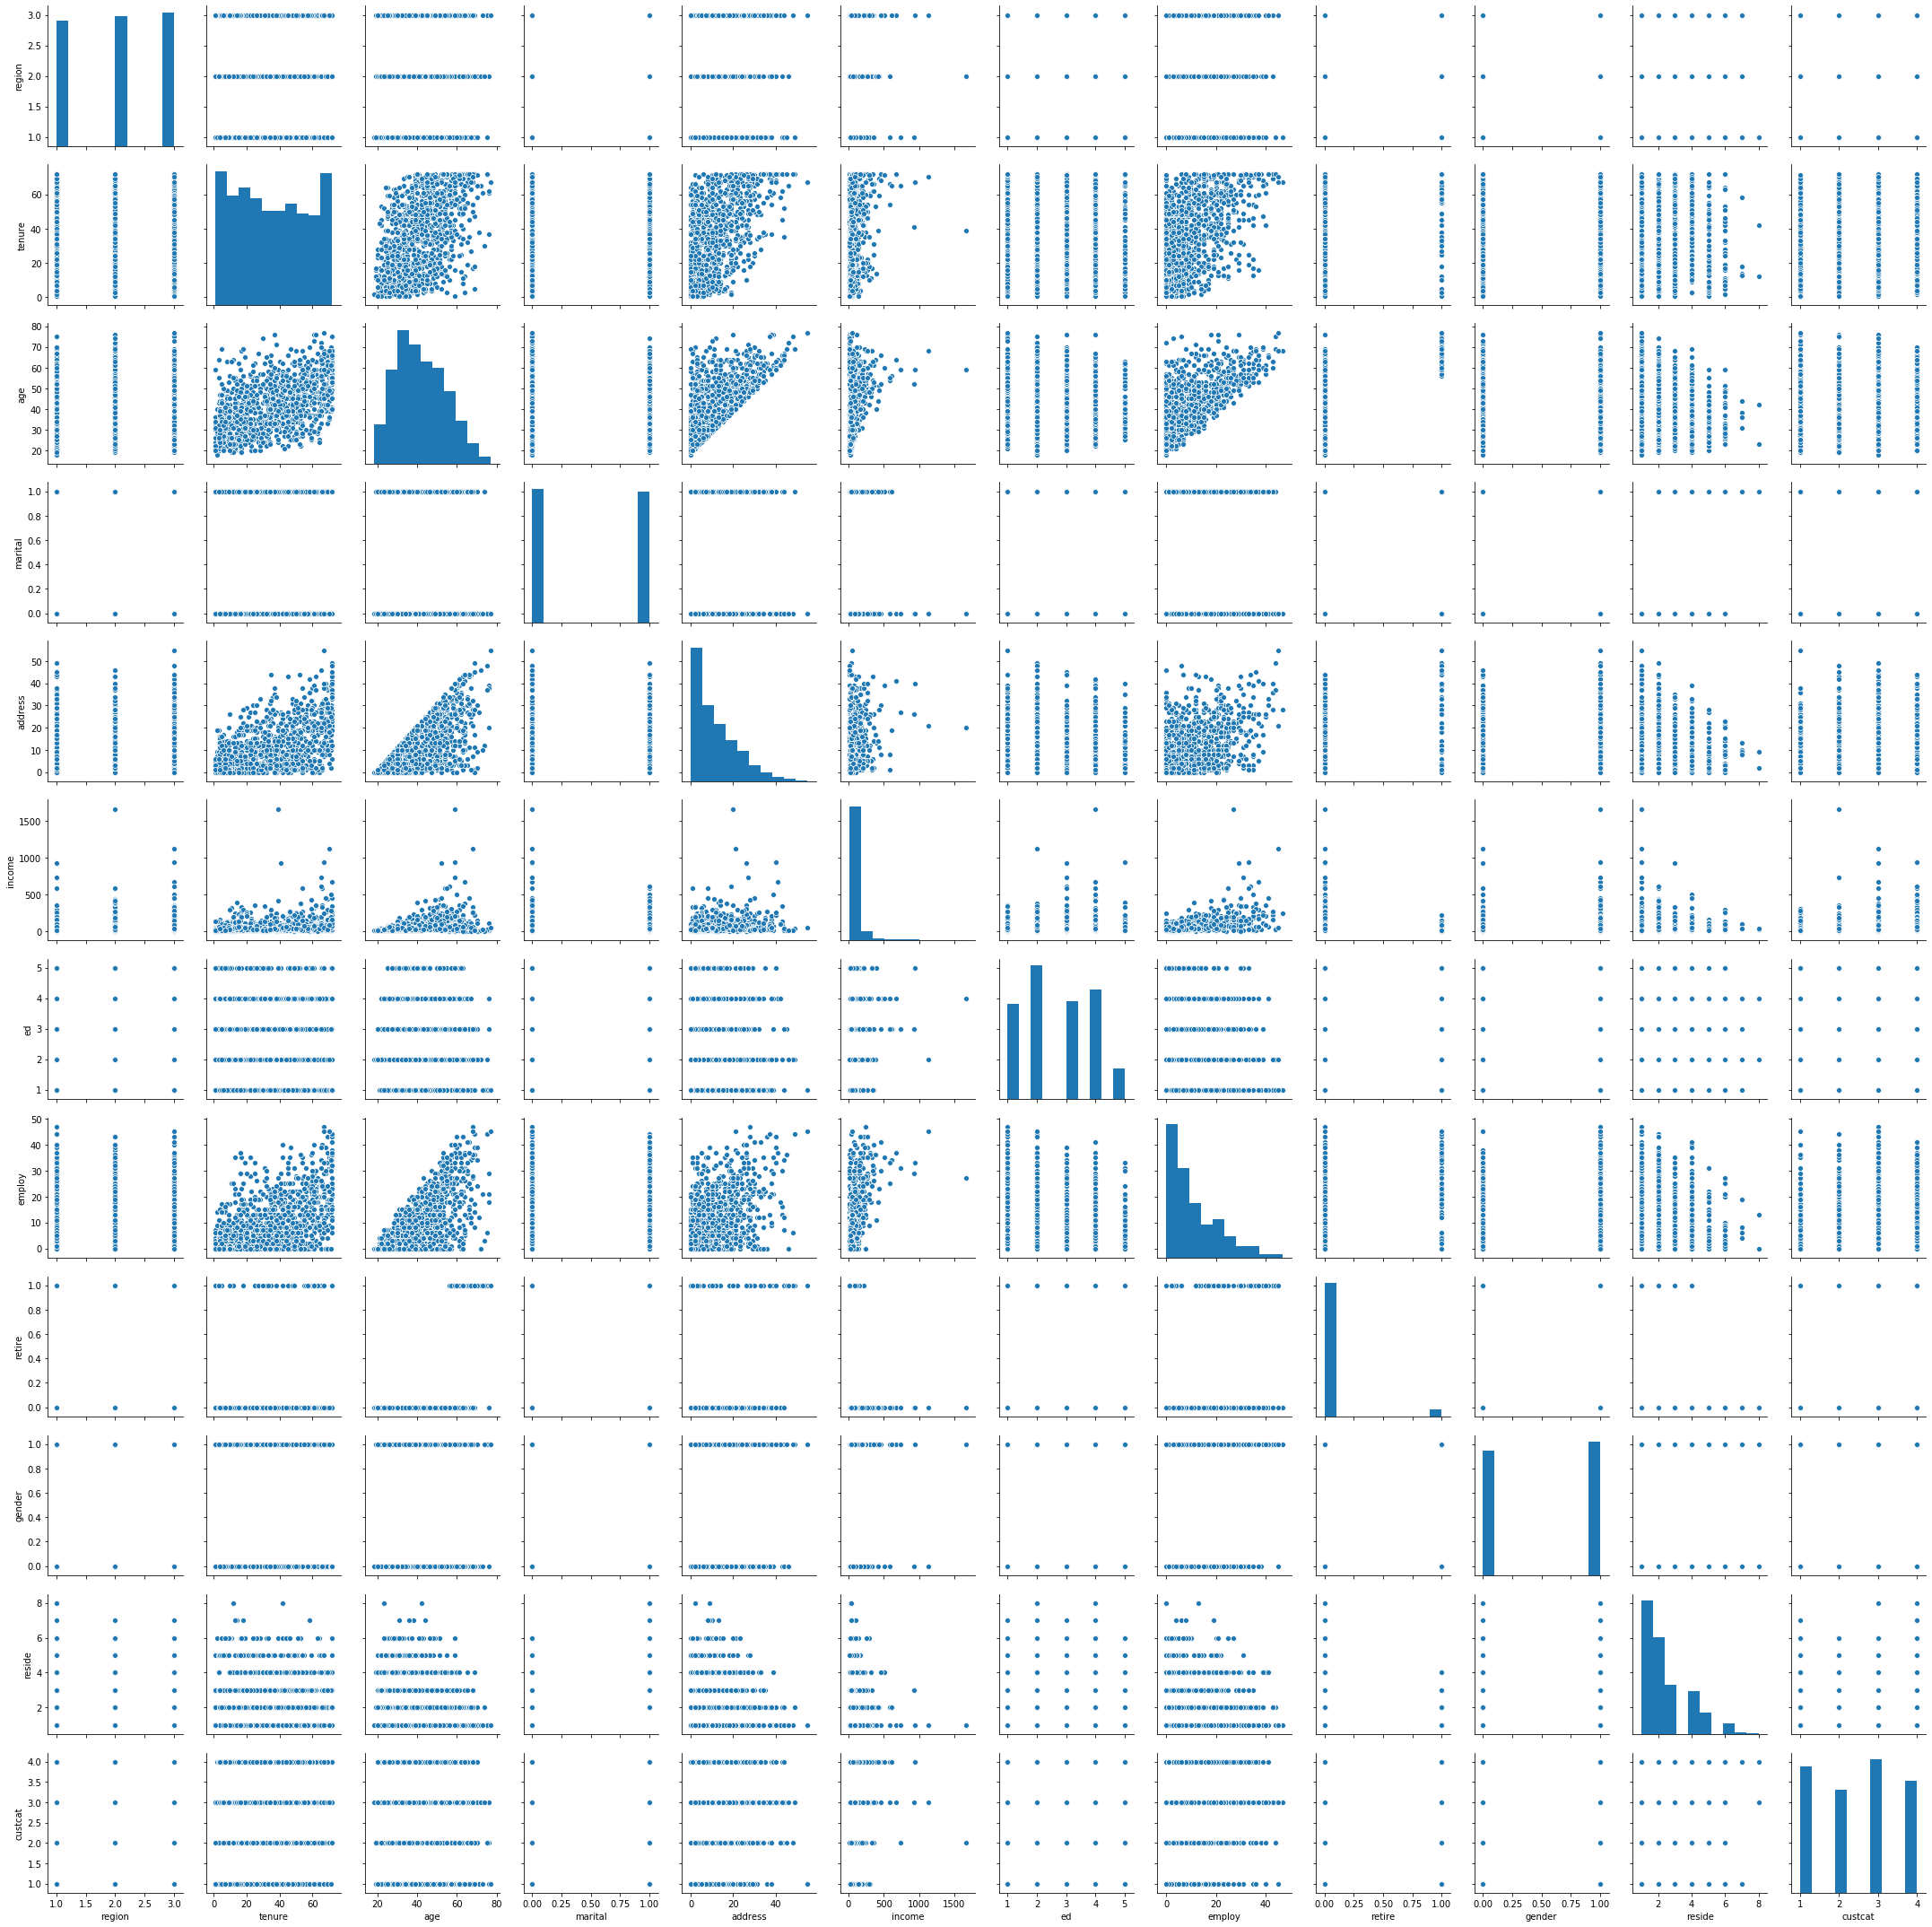

In [9]:
sns.pairplot(data=tele_data)
plt.show()

### Check Income using histogram with 50 Bin

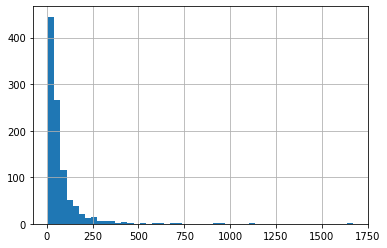

In [12]:
tele_data['income'].hist(bins=50)
plt.show()

### Feature set 

Lets define feature sets, X:

In [13]:
tele_data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [14]:
tele_data.values

array([[ 2, 13, 44, ...,  0,  2,  1],
       [ 3, 11, 33, ...,  0,  6,  4],
       [ 3, 68, 52, ...,  1,  2,  3],
       ...,
       [ 3, 67, 59, ...,  1,  1,  4],
       [ 3, 70, 49, ...,  1,  1,  3],
       [ 3, 50, 36, ...,  1,  3,  2]], dtype=int64)

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [16]:
X = tele_data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X

array([[ 2, 13, 44, ...,  0,  0,  2],
       [ 3, 11, 33, ...,  0,  0,  6],
       [ 3, 68, 52, ...,  0,  1,  2],
       ...,
       [ 3, 67, 59, ...,  0,  1,  1],
       [ 3, 70, 49, ...,  0,  1,  1],
       [ 3, 50, 36, ...,  0,  1,  3]], dtype=int64)

What are our labels?

In [17]:
y = tele_data['custcat'].values
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

## Normalize Data 

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [18]:
from sklearn import preprocessing

In [20]:
# Instantiating the object
scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

In [21]:
# Training/ Fitting the scales for input features X
scaler.fit(X)

StandardScaler()

In [22]:
# Transforming/ Applying the scales on input features X
X_scaled = scaler.transform(X)
X_scaled

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [23]:
# Using Chaning method
X_scaled2 = preprocessing.StandardScaler().fit(X).transform(X)
X_scaled2

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train Test split 


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)

print("-"*40)
print(y_train.shape)
print(y_test.shape)

(800, 11)
(200, 11)
----------------------------------------
(800,)
(200,)


In [28]:
X_train

array([[-0.02696767, -0.5398815 , -1.16980352, ..., -0.22207644,
        -1.03459817,  1.85983368],
       [-1.25277087,  0.49060549,  0.50316528, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553,  0.11588295, -0.85114279, ..., -0.22207644,
         0.96655883,  1.16300577],
       ...,
       [ 1.19883553, -0.5398815 , -0.53248207, ..., -0.22207644,
         0.96655883, -0.23065004],
       [-1.25277087, -0.49304118, -0.21382135, ..., -0.22207644,
        -1.03459817,  1.16300577],
       [ 1.19883553,  0.63112644,  1.698143  , ...,  4.50295411,
        -1.03459817, -0.92747794]])

In [29]:
y_train

array([2, 3, 4, 3, 1, 1, 1, 3, 3, 3, 4, 2, 4, 2, 2, 4, 4, 3, 3, 4, 4, 3,
       1, 1, 4, 1, 3, 1, 1, 4, 3, 4, 4, 3, 1, 4, 1, 1, 2, 3, 2, 4, 3, 4,
       1, 3, 4, 1, 3, 4, 3, 4, 2, 3, 1, 4, 4, 4, 2, 1, 3, 4, 3, 3, 3, 3,
       4, 3, 1, 3, 3, 3, 1, 3, 2, 4, 3, 2, 4, 1, 2, 2, 2, 1, 4, 3, 4, 2,
       3, 3, 1, 2, 1, 4, 3, 3, 1, 4, 1, 1, 3, 3, 4, 1, 2, 4, 2, 1, 1, 3,
       1, 2, 4, 1, 4, 4, 4, 2, 1, 4, 3, 4, 3, 1, 1, 3, 3, 4, 3, 1, 1, 3,
       3, 4, 2, 1, 4, 2, 1, 3, 3, 1, 2, 1, 3, 4, 2, 4, 4, 4, 3, 2, 3, 2,
       1, 4, 1, 2, 4, 2, 1, 1, 4, 4, 3, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 3,
       2, 3, 2, 2, 3, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 2, 3, 2, 2, 3, 1, 1,
       1, 4, 2, 3, 1, 4, 2, 4, 3, 4, 4, 3, 4, 3, 2, 1, 4, 1, 2, 1, 2, 3,
       2, 3, 1, 3, 2, 4, 1, 4, 3, 4, 1, 2, 3, 3, 2, 2, 1, 3, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 3, 4, 1, 3, 2, 4, 3, 2, 3, 3, 3, 2, 2, 1,
       1, 2, 2, 4, 4, 1, 2, 3, 1, 3, 2, 3, 1, 2, 1, 4, 1, 3, 4, 1, 3, 3,
       1, 3, 1, 3, 1, 2, 3, 3, 2, 3, 1, 3, 2, 3, 1,

<div id="classification">
    <h2>Classification</h2>
</div>

# Build a K nearest neighbor (KNN)

#### Import library 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

Classifier implementing the k-nearest neighbors vote.

### Training

Lets start the algorithm with k=4 for now:

In [33]:
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

### Predicting
we can use the model to predict the test set:

In [34]:
knn.predict(X_test)

array([1, 2, 3, 2, 3, 3, 3, 1, 1, 2, 4, 3, 1, 2, 1, 3, 1, 3, 3, 2, 3, 1,
       1, 4, 1, 4, 1, 2, 1, 1, 4, 1, 2, 1, 1, 4, 1, 3, 3, 3, 3, 4, 2, 3,
       3, 1, 1, 1, 1, 2, 4, 1, 3, 2, 1, 4, 1, 3, 1, 3, 2, 3, 1, 3, 4, 4,
       4, 3, 1, 2, 3, 1, 2, 1, 3, 1, 2, 1, 3, 4, 3, 2, 1, 3, 1, 1, 3, 2,
       4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 3, 1, 2, 1, 4, 2, 2,
       4, 3, 1, 2, 4, 1, 4, 3, 3, 3, 1, 4, 1, 3, 3, 1, 3, 3, 4, 4, 3, 3,
       3, 2, 4, 1, 1, 3, 1, 4, 4, 1, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1,
       2, 4, 2, 1, 3, 1, 2, 3, 1, 1, 3, 4, 1, 2, 4, 4, 2, 1, 3, 1, 1, 1,
       4, 1, 3, 2, 2, 1, 2, 2, 1, 4, 4, 1, 2, 3, 1, 1, 3, 1, 4, 3, 3, 2,
       1, 3], dtype=int64)

In [35]:
X_test_predicted = knn.predict(X_test)
X_test_predicted

array([1, 2, 3, 2, 3, 3, 3, 1, 1, 2, 4, 3, 1, 2, 1, 3, 1, 3, 3, 2, 3, 1,
       1, 4, 1, 4, 1, 2, 1, 1, 4, 1, 2, 1, 1, 4, 1, 3, 3, 3, 3, 4, 2, 3,
       3, 1, 1, 1, 1, 2, 4, 1, 3, 2, 1, 4, 1, 3, 1, 3, 2, 3, 1, 3, 4, 4,
       4, 3, 1, 2, 3, 1, 2, 1, 3, 1, 2, 1, 3, 4, 3, 2, 1, 3, 1, 1, 3, 2,
       4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 3, 1, 2, 1, 4, 2, 2,
       4, 3, 1, 2, 4, 1, 4, 3, 3, 3, 1, 4, 1, 3, 3, 1, 3, 3, 4, 4, 3, 3,
       3, 2, 4, 1, 1, 3, 1, 4, 4, 1, 3, 3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1,
       2, 4, 2, 1, 3, 1, 2, 3, 1, 1, 3, 4, 1, 2, 4, 4, 2, 1, 3, 1, 1, 1,
       4, 1, 3, 2, 2, 1, 2, 2, 1, 4, 4, 1, 2, 3, 1, 1, 3, 1, 4, 3, 3, 2,
       1, 3], dtype=int64)

### Accuracy evaluation


In [36]:
from sklearn import metrics

In [38]:
# Training Accuracy:
metrics.accuracy_score(y_train, knn.predict(X_train))

0.55875

In [39]:
# Test Accuracy:
metrics.accuracy_score(y_test, X_test_predicted)

0.32

### Build a Knn model with various K value and Decide the best K value

In [40]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.305, 0.32 , 0.325, 0.32 , 0.35 , 0.32 , 0.31 , 0.325, 0.3  ])

#### Plot  model accuracy  for Different number of Neighbors 

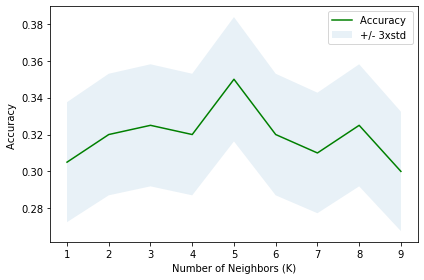

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()